###**Import Libraries**

In [41]:
import pandas as pd
import numpy as np

#untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#untuk data processing 
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

#untuk membuang warnings
import warnings
warnings.filterwarnings('ignore')

###**Import Data**

In [42]:
kabupatenkota = pd.read_excel('dataset_model4.xlsx').set_index('nama_kabupaten_kota')
kabupatenkota

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
nama_kabupaten_kota,,,,,,,,
Kepulauan Seribu,68.76,0.2240,0.1031,0.096701,0.0273,0.000239,0.093896,10.18
Jakarta Selatan,74.12,0.3175,0.1368,0.163100,0.0568,0.000057,0.100274,154.32
Jakarta Timur,74.47,0.3326,0.1334,0.152697,0.0441,0.000043,0.112339,182.70
Jakarta Pusat,74.11,0.4122,0.1843,0.233388,0.0599,0.000069,0.173944,52.38
Jakarta Barat,73.62,0.3412,0.1255,0.164697,0.0401,0.000040,0.081657,124.44
...,...,...,...,...,...,...,...,...
Puncak,65.74,0.0973,0.0581,0.066067,0.0037,0.000000,0.066067,5014.26
Dogiyai,65.73,0.1462,0.0340,0.054971,0.0115,0.000010,0.049590,6137.04
Intan Jaya,65.60,0.0705,0.0601,0.059206,0.0353,0.000020,0.058626,9879.20


###**Data Preprocessing**

####Check and Fix Data Type for Each Column

In [43]:
kabupatenkota.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, Kepulauan Seribu to Kota Jayapura
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               514 non-null    float64
 1   persentase_keluhan_kesehatan     514 non-null    float64
 2   persentase_menderita_sakit       514 non-null    float64
 3   persentase_berobat_jalan         514 non-null    float64
 4   persentase_rawat_inap            514 non-null    float64
 5   fasilitas_kesehatan_per_kapita   514 non-null    float64
 6   persentase_jamkes_berobat_jalan  514 non-null    float64
 7   luas_wilayah_km2                 514 non-null    float64
dtypes: float64(8)
memory usage: 36.1+ KB


####Check Duplicated and Null Entries

In [44]:
kabupatenkota.duplicated().sum()

0

In [45]:
kabupatenkota.isnull().sum()

umur_harapan_hidup                 0
persentase_keluhan_kesehatan       0
persentase_menderita_sakit         0
persentase_berobat_jalan           0
persentase_rawat_inap              0
fasilitas_kesehatan_per_kapita     0
persentase_jamkes_berobat_jalan    0
luas_wilayah_km2                   0
dtype: int64

=================================================================================================================== <br>
Tidak ada data yang terduplikasi dan data kosong.
=================================================================================================================== <br>

####Visualization of Raw Data

####Data Descriptive Statistics Summary

In [46]:
kabupatenkota.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,69.534047,0.284564,0.136509,0.127601,0.047800,0.000064,0.067839,3742.187121
std,3.468444,0.082796,0.042707,0.048926,0.018959,0.000054,0.040393,5521.653284
min,55.270000,0.002300,0.000600,0.000554,0.000000,0.000000,0.000554,10.180000
25%,67.217500,0.229225,0.103400,0.090263,0.035900,0.000029,0.038407,809.720000
50%,69.870000,0.286500,0.135099,0.126064,0.047100,0.000051,0.061105,1883.275000
75%,71.862500,0.337850,0.167725,0.159021,0.059850,0.000084,0.088100,4241.090000
max,77.650000,0.572500,0.273900,0.276433,0.109000,0.000392,0.221065,46430.540000


###**Outlier**

####Check Outliers Using Box Plot

In [47]:
Q1 = kabupatenkota.quantile(0.25)
Q3 = kabupatenkota.quantile(0.75)
IQR = Q3 - Q1

print("Kabupaten/Kota yang Memiliki Nilai Outlier:")
print(kabupatenkota[((kabupatenkota < (Q1 - 1.5 * IQR)) |(kabupatenkota > (Q3 + 1.5 * IQR))).any(axis=1)])
print('\n')
kabupatenkota= kabupatenkota[~((kabupatenkota< (Q1 - 1.5 * IQR)) |(kabupatenkota> (Q3 + 1.5 * IQR))).any(axis=1)]
print("Kabupaten/Kota Shape Setelah Membuang Ouliers:", kabupatenkota.shape)

Kabupaten/Kota yang Memiliki Nilai Outlier:
                       umur_harapan_hidup  persentase_keluhan_kesehatan  \
nama_kabupaten_kota                                                       
Kepulauan Seribu                    68.76                        0.2240   
Jakarta Pusat                       74.11                        0.4122   
KABUPATEN PANGANDARAN               71.40                        0.5130   
Kabupaten Jombang                   72.40                        0.5725   
Kota Blitar                         73.75                        0.4343   
...                                   ...                           ...   
Nduga                               55.27                        0.1958   
Lanny Jaya                          66.06                        0.0529   
Mamberamo Tengah                    63.59                        0.2537   
Intan Jaya                          65.60                        0.0705   
Deiyai                              65.24               

####Data Descriptive Statistic Summary After Removing Outliers

In [48]:
kabupatenkota.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,69.905048,0.289647,0.138413,0.129385,0.049302,0.000055,0.064582,2311.856507
std,3.200335,0.074440,0.039927,0.045055,0.017357,0.000037,0.034473,2084.047544
min,61.480000,0.089600,0.022800,0.020254,0.003700,0.000000,0.004931,16.060000
25%,67.690000,0.240625,0.109650,0.094898,0.038975,0.000029,0.038335,728.607500
50%,70.060000,0.296000,0.138550,0.129732,0.048600,0.000048,0.059830,1728.260000
75%,72.097500,0.338425,0.168875,0.159362,0.060525,0.000075,0.083286,3368.430000
max,77.650000,0.473600,0.255200,0.261457,0.095000,0.000167,0.159702,8997.000000


###**Data Processing**

####Standardizes Data with Minmax &Standard Scaler
StandardScaler mentransformasi data sehingga memiliki rata-rata 0 dan standar deviasi 1. Hal ini dilakukan untuk menghindari bias sehingga tiap data memiliki skala dan satuan yang sebanding. Penggunaan metode K-Means Clustering disarankan untuk menggunakan StandardScaler karena K-Means sensitif terhadap nilai varians.

####Minmax

In [49]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = kabupatenkota.columns
d = scaler.fit_transform(kabupatenkota)
scaled_df = pd.DataFrame(d, columns=names)

In [50]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               418 non-null    float64
 1   persentase_keluhan_kesehatan     418 non-null    float64
 2   persentase_menderita_sakit       418 non-null    float64
 3   persentase_berobat_jalan         418 non-null    float64
 4   persentase_rawat_inap            418 non-null    float64
 5   fasilitas_kesehatan_per_kapita   418 non-null    float64
 6   persentase_jamkes_berobat_jalan  418 non-null    float64
 7   luas_wilayah_km2                 418 non-null    float64
dtypes: float64(8)
memory usage: 26.2 KB


In [51]:
scaled_df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.521030,0.520955,0.497473,0.452445,0.499476,0.330075,0.385414,0.255630
std,0.197918,0.193855,0.171802,0.186792,0.190109,0.220664,0.222734,0.232052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384045,0.393294,0.373709,0.309467,0.386364,0.172710,0.215828,0.079340
50%,0.530612,0.537500,0.498064,0.453883,0.491785,0.288986,0.354708,0.190648
75%,0.656617,0.647982,0.628550,0.576725,0.622399,0.447676,0.506267,0.373276
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####StandardScaler

In [52]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler2 = StandardScaler()
names2 = scaled_df.columns
d2 = scaler2.fit_transform(scaled_df)
z_scaled_df = pd.DataFrame(d2, columns = names)

In [53]:
z_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               418 non-null    float64
 1   persentase_keluhan_kesehatan     418 non-null    float64
 2   persentase_menderita_sakit       418 non-null    float64
 3   persentase_berobat_jalan         418 non-null    float64
 4   persentase_rawat_inap            418 non-null    float64
 5   fasilitas_kesehatan_per_kapita   418 non-null    float64
 6   persentase_jamkes_berobat_jalan  418 non-null    float64
 7   luas_wilayah_km2                 418 non-null    float64
dtypes: float64(8)
memory usage: 26.2 KB


In [54]:
z_scaled_df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
count,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02
mean,-4.632127e-16,-4.674623e-17,4.568382e-17,-3.264268e-16,-1.556437e-16,7.968108e-19,1.290833e-16,1.976091e-16
std,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00
min,-2.635707e+00,-2.690561e+00,-2.899080e+00,-2.425092e+00,-2.630459e+00,-1.497618e+00,-1.732455e+00,-1.102925e+00
25%,-6.929595e-01,-6.593250e-01,-7.212477e-01,-7.663560e-01,-5.956990e-01,-7.139988e-01,-7.622970e-01,-7.606094e-01
50%,4.847551e-02,8.545045e-02,3.442601e-03,7.710771e-03,-4.050215e-02,-1.864312e-01,-1.380266e-01,-2.803659e-01
75%,6.858906e-01,6.560527e-01,7.638659e-01,6.661371e-01,6.473651e-01,5.335756e-01,5.432375e-01,5.075890e-01
max,2.422945e+00,2.474112e+00,2.928534e+00,2.934882e+00,2.635979e+00,3.039582e+00,2.762592e+00,3.211613e+00


#### Elbow Analysis
Elbow Analysis adalah salah satu cara yang dapat digunakan untuk menentukan nilai k (jumlah kluster) yang akan digunakan.

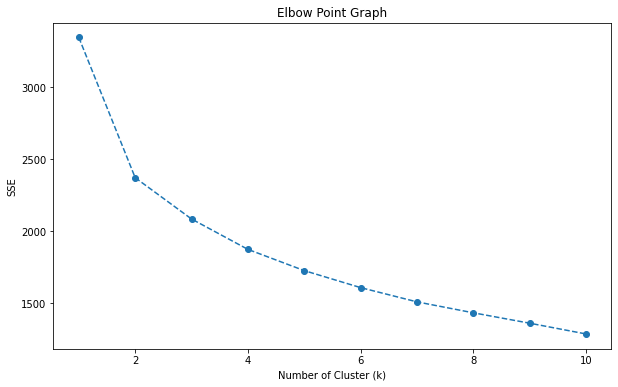

In [55]:
SSE = [] #menyimpan nilai Sum of Squared Error
for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(z_scaled_df)
  SSE.append(kmeans.inertia_) 
   
plt.figure(figsize = (10,6))
plt.plot(range(1,11), SSE, marker = 'o', linestyle = '--') 
plt.xlabel('Number of Cluster (k)') 
plt.ylabel('SSE') 
plt.title('Elbow Point Graph')
plt.show()

=================================================================================================================== <br>
Berdasarkan grafik Elbow Analysis di atas, hipotesis sementara untuk jumlah kluster yang optimal untuk dipilih dimana kurva mulai bengkok dan melandai adalah di nilai k = 3. Untuk lebih jelasnya akan digunakan metode Silhouette Analysis.
=================================================================================================================== <br>

#### Silhouette Analysis
Silhouette Analysis adalah cara lain yang dapat digunakan untuk menentukan nilai k (jumlah kluster) yang akan digunakan.

In [56]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters, random_state = 0)
    preds = clusterer.fit_predict(z_scaled_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(z_scaled_df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.24919495396501326)
For n_clusters = 3, silhouette score is 0.1902861946721009)
For n_clusters = 4, silhouette score is 0.1656014087833231)
For n_clusters = 5, silhouette score is 0.17408802019844782)
For n_clusters = 6, silhouette score is 0.15761028388993906)
For n_clusters = 7, silhouette score is 0.15550601138233774)
For n_clusters = 8, silhouette score is 0.15490404223279525)
For n_clusters = 9, silhouette score is 0.16068476882883984)
For n_clusters = 10, silhouette score is 0.151833855290329)


=================================================================================================================== <br>
Berdasarkan tabel di atas, hipotesis sementara dari Elbow Analysis untuk nilai k = 4 memang memiliki nilai silhouette score yang terhitung tinggi, namun memang bukan yang tertinggi. k = 2 memiliki nilai silhouette score tertinggi tapi akan diabaikan karena kurang relevan dengan masalah pengelompokkan. Maka dari itu akan kami clustering untuk ketiga silhouette score tertinggi yaitu k = 6, k = 7, dan k = 9.
=================================================================================================================== <br>

###**Data Clustering dan Labeling**

###Clustering k = 3

In [57]:
km_3 = KMeans(n_clusters = 3, random_state = 0)
model_3 = km_3.fit(z_scaled_df)
kabupatenkota['Cluster_k_3'] = model_3.labels_
z_scaled_df['Cluster_k_3'] = model_3.labels_
kabupatenkota.head()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2,Cluster_k_3
nama_kabupaten_kota,,,,,,,,,
Jakarta Selatan,74.12,0.3175,0.1368,0.163100,0.0568,0.000057,0.100274,154.32,2
Jakarta Timur,74.47,0.3326,0.1334,0.152697,0.0441,0.000043,0.112339,182.70,2
Jakarta Barat,73.62,0.3412,0.1255,0.164697,0.0401,0.000040,0.081657,124.44,2
Jakarta Utara,73.28,0.3313,0.1454,0.176252,0.0552,0.000042,0.111180,139.99,2
Kab Pandeglang,64.66,0.3207,0.1816,0.123341,0.0274,0.000030,0.029639,2746.89,0


In [58]:
print('Centroids:', km_3.cluster_centers_.tolist())

Centroids: [[-0.4253634307825853, 0.8037183774507954, 0.93767837050836, 0.4054201761623041, -0.11510840200996067, -0.12699408638543264, -0.027954766096951918, 0.2022196786774931], [-0.4429989160647178, -0.946766854934683, -0.8410361092908107, -0.9481791863682631, -0.7508080162364416, 0.1549451080374869, -0.6714475530060092, 0.5209345475069228], [0.8021687927510224, 0.3045245208752123, 0.08636961606877602, 0.6338165757795957, 0.8608797216236156, -0.053574705802623426, 0.7081609499906981, -0.698018797591939]]


In [59]:
df_analysis_3 = pd.concat([(kabupatenkota.groupby(['Cluster_k_3']).mean()), (z_scaled_df.groupby(['Cluster_k_3']).mean())], axis = 1)
df_analysis_3

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
Cluster_k_3,,,,,,,,,,,,,,,,
0,68.545372,0.349404,0.175806,0.147629,0.047307,0.000050,0.063619,2732.787521,-0.425363,0.803718,0.937678,0.405420,-0.115108,-0.126994,-0.027955,0.202220
1,68.489000,0.219253,0.104873,0.086716,0.036286,0.000061,0.041463,3396.209467,-0.442999,-0.946767,-0.841036,-0.948179,-0.750808,0.154945,-0.671448,0.520935
2,72.469184,0.312288,0.141857,0.157907,0.064227,0.000053,0.088965,858.893265,0.802169,0.304525,0.086370,0.633817,0.860880,-0.053575,0.708161,-0.698019


In [60]:
for i in range (3):
  KabupatendanKota = list(kabupatenkota.index.where(kabupatenkota['Cluster_k_3'] == i).dropna())
  print("Kabupaten/Kota in cluster {} is {}".format(i, KabupatendanKota))
  print("There are {} Kabupaten dan Kota in cluster {}".format(len(KabupatendanKota), i))

Kabupaten/Kota in cluster 0 is ['Kab Pandeglang', 'Kab Lebak', 'Kab Tangerang', 'Kab Serang', 'Kota Serang', 'KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR', 'KABUPATEN GARUT', 'KABUPATEN TASIKMALAYA', 'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN CIREBON', 'KABUPATEN MAJALENGKA', 'KABUPATEN INDRAMAYU', 'KABUPATEN BANDUNG BARAT', 'Kabupaten Wonosobo', 'Kabupaten Blora', 'Kabupaten Pekalongan', 'Kabupaten Brebes', 'Kabupaten Ponorogo', 'Kabupaten Blitar', 'Kabupaten Malang', 'Kabupaten Jember', 'Kabupaten Banyuwangi', 'Kabupaten Bondowoso', 'Kabupaten Situbondo', 'Kabupaten Probolinggo', 'Kabupaten Pasuruan', 'Kabupaten Nganjuk', 'Kabupaten Bojonegoro', 'Kabupaten Tuban', 'Kabupaten Sampang', 'KABUPATEN BANGLI', 'KABUPATEN KARANGASEM', 'KABUPATEN BULELENG', 'ACEH SELATAN', 'ACEH TIMUR', 'GAYO LUES', 'Langkat', 'Serdang Bedagai', 'Batu Bara', 'Labuanbatu Utara', 'Tanjungbalai', 'Padangsidimpuan', 'Kab. Pesisir Selatan', 'Kab. Solok', 'Kab. Sijunjung', 'Kab. Padang Par

####Clustering k = 4

In [61]:
km_4 = KMeans(n_clusters = 4, random_state = 0)
model_4 = km_4.fit(z_scaled_df)
kabupatenkota['Cluster_k_4'] = model_4.labels_
z_scaled_df['Cluster_k_4'] = model_4.labels_
kabupatenkota.head()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2,Cluster_k_3,Cluster_k_4
nama_kabupaten_kota,,,,,,,,,,
Jakarta Selatan,74.12,0.3175,0.1368,0.163100,0.0568,0.000057,0.100274,154.32,2,3
Jakarta Timur,74.47,0.3326,0.1334,0.152697,0.0441,0.000043,0.112339,182.70,2,3
Jakarta Barat,73.62,0.3412,0.1255,0.164697,0.0401,0.000040,0.081657,124.44,2,3
Jakarta Utara,73.28,0.3313,0.1454,0.176252,0.0552,0.000042,0.111180,139.99,2,3
Kab Pandeglang,64.66,0.3207,0.1816,0.123341,0.0274,0.000030,0.029639,2746.89,0,1


In [62]:
df_analysis_4 = pd.concat([(kabupatenkota.groupby(['Cluster_k_4']).mean()), (z_scaled_df.groupby(['Cluster_k_4']).mean())], axis = 1)
df_analysis_4

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2,Cluster_k_3,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2,Cluster_k_3
Cluster_k_4,,,,,,,,,,,,,,,,,,
0,71.968901,0.254687,0.112947,0.121171,0.057271,0.000054,0.062563,920.659341,1.648352,0.645660,-0.470198,-0.638578,-0.182528,0.459690,-0.021943,-0.058627,-0.668346,1.648352
1,68.549583,0.348992,0.175982,0.148234,0.047422,0.000050,0.063732,2680.585750,0.000000,-0.424046,0.798171,0.942068,0.418871,-0.108472,-0.139192,-0.024678,0.177141,0.000000
2,67.806134,0.222276,0.106826,0.081632,0.032620,0.000063,0.038572,4044.613950,0.991597,-0.656628,-0.906107,-0.792052,-1.061149,-0.962263,0.214521,-0.755412,0.832435,0.991597
3,72.457500,0.335976,0.156230,0.176749,0.066184,0.000052,0.103001,904.507614,2.000000,0.798514,0.623116,0.446780,1.052525,0.973797,-0.077592,1.115801,-0.676105,2.000000


In [63]:
print('Centroids:', km_4.cluster_centers_.tolist())

Centroids: [[0.6456595061851977, -0.47019826111359764, -0.6385782668938602, -0.18252750753996497, 0.4596900366347196, -0.021942846813508617, -0.05862732810519324, -0.6683457264449284, 1.6483516483516476], [-0.4240459187792104, 0.798170851918452, 0.9420679886429731, 0.4188710448339702, -0.10847170313513285, -0.13919219803725855, -0.02467795791968188, 0.1771413999302952, -1.3322676295501878e-15], [-0.6566277828132013, -0.9061066579556024, -0.7920516334716676, -1.0611491433999105, -0.9622634269120356, 0.21452063077546266, -0.7554122393369425, 0.8324348693825687, 0.9915966386554622], [0.7985136516525343, 0.6231162707709075, 0.4467796367421928, 1.0525252939846552, 0.9737972596021444, -0.0775919572474966, 1.1158011169208026, -0.6761051857008242, 1.9999999999999991]]


In [64]:
for i in range (4):
  KabupatendanKota = list(kabupatenkota.index.where(kabupatenkota['Cluster_k_4'] == i).dropna())
  print("Kabupaten/Kota in cluster {} is {}".format(i, KabupatendanKota))
  print("There are {} Kabupaten dan Kota in cluster {}".format(len(KabupatendanKota), i))

Kabupaten/Kota in cluster 0 is ['Kota Tangerang', 'Kota Tangerang Selatan', 'KABUPATEN BANDUNG', 'KABUPATEN SUBANG', 'KABUPATEN KARAWANG', 'KOTA BANDUNG', 'KOTA BEKASI', 'KOTA DEPOK', 'KOTA CIMAHI', 'Kabupaten Sukoharjo', 'Kabupaten Wonogiri', 'Kabupaten Karanganyar', 'Kabupaten Sragen', 'Kabupaten Temanggung', 'Kabupaten Batang', 'Kota Pekalongan', 'Kabupaten Pacitan', 'Kabupaten Tulungagung', 'Kabupaten Kediri', 'Kabupaten Lumajang', 'Kabupaten Sidoarjo', 'Kabupaten Mojokerto', 'Kabupaten Madiun', 'Kabupaten Magetan', 'Kabupaten Gresik', 'Kabupaten Pamekasan', 'Kota Surabaya', 'KABUPATEN JEMBRANA', 'KABUPATEN TABANAN', 'KABUPATEN BADUNG', 'KABUPATEN KLUNGKUNG', 'KOTA DENPASAR', 'ACEH BESAR', 'BENER MERIAH', 'Karo', 'Deli Serdang', 'Pematangsiantar', 'Tebing Tinggi', 'Medan', 'Binjai', 'Gunungsitoli', 'Kota Solok', 'Dumai', 'Karimun', 'Batam', 'Tanjungpinang', 'Kota Jambi', 'Palembang', 'Lubuk Linggau', 'Bangka', 'Kota Bengkulu', 'Lampung Selatan', 'Kota Bandar Lampung', 'Mempawah', '


####Clustering k = 5

In [65]:
km_5 = KMeans(n_clusters = 5, random_state = 0)
model_5 = km_5.fit(z_scaled_df)
kabupatenkota['Cluster_k_5'] = model_5.labels_
z_scaled_df['Cluster_k_5'] = model_5.labels_
kabupatenkota.head()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2,Cluster_k_3,Cluster_k_4,Cluster_k_5
nama_kabupaten_kota,,,,,,,,,,,
Jakarta Selatan,74.12,0.3175,0.1368,0.163100,0.0568,0.000057,0.100274,154.32,2,3,3
Jakarta Timur,74.47,0.3326,0.1334,0.152697,0.0441,0.000043,0.112339,182.70,2,3,3
Jakarta Barat,73.62,0.3412,0.1255,0.164697,0.0401,0.000040,0.081657,124.44,2,3,3
Jakarta Utara,73.28,0.3313,0.1454,0.176252,0.0552,0.000042,0.111180,139.99,2,3,3
Kab Pandeglang,64.66,0.3207,0.1816,0.123341,0.0274,0.000030,0.029639,2746.89,0,1,4


In [66]:
df_analysis_5 = pd.concat([(kabupatenkota.groupby(['Cluster_k_5']).mean()), (z_scaled_df.groupby(['Cluster_k_5']).mean())], axis = 1)
df_analysis_5

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2,Cluster_k_3,Cluster_k_4,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2,Cluster_k_3,Cluster_k_4
Cluster_k_5,,,,,,,,,,,,,,,,,,,,
0,72.016778,0.254542,0.113275,0.120755,0.057211,0.000053,0.062831,912.222222,1.655556,0.000000,0.660637,-0.472143,-0.630346,-0.191765,0.456211,-0.052871,-0.050853,-0.672399,1.655556,0.000000
1,67.345227,0.314852,0.161786,0.124131,0.047216,0.000106,0.072351,3295.808182,0.204545,1.181818,-0.800819,0.339007,0.586104,-0.116742,-0.120340,1.387588,0.225646,0.472701,0.204545,1.181818
2,67.849091,0.218239,0.103668,0.080249,0.031860,0.000058,0.037564,4073.372455,1.000000,2.000000,-0.643189,-0.960408,-0.871260,-1.091901,-1.006112,0.081339,-0.784703,0.846251,1.000000,2.000000
3,72.457500,0.335976,0.156230,0.176749,0.066184,0.000052,0.103001,904.507614,2.000000,3.000000,0.798514,0.623116,0.446780,1.052525,0.973797,-0.077592,1.115801,-0.676105,2.000000,3.000000
4,69.022674,0.357416,0.178971,0.155487,0.047128,0.000030,0.057686,2460.149070,0.000000,1.000000,-0.276043,0.911479,1.017029,0.580028,-0.125417,-0.679241,-0.200289,0.071241,0.000000,1.000000


In [67]:
print('Centroids:', km_5.cluster_centers_.tolist())

Centroids: [[0.6606373311885894, -0.4721429618023047, -0.6303459449835925, -0.1917654855740811, 0.45621075728524624, -0.05287126229788836, -0.05085324911322834, -0.6723990067323462, 1.6555555555555548, 0.0], [-0.800818801543193, 0.3390072859667658, 0.5861039509056104, -0.11674236173551324, -0.12034037400693683, 1.387588118372932, 0.22564607125442893, 0.4727007160464764, 0.20454545454545425, 1.181818181818182], [-0.643189209263699, -0.9604080803495619, -0.8712597545749035, -1.091900540617525, -1.0061120413018225, 0.08133927879005336, -0.7847025109191195, 0.8462507571340009, 1.0, 2.0000000000000004], [0.7985136516525343, 0.6231162707709075, 0.4467796367421928, 1.0525252939846552, 0.9737972596021444, -0.0775919572474966, 1.1158011169208026, -0.6761051857008242, 1.9999999999999991, 3.0], [-0.2760432658777778, 0.9114791045381594, 1.0170293741698015, 0.5800278048291615, -0.12541658140878117, -0.6792406050084324, -0.20028903259222955, 0.07124130414882221, -1.1102230246251565e-15, 1.0000000000

In [68]:
for i in range (5):
  KabupatendanKota = list(kabupatenkota.index.where(kabupatenkota['Cluster_k_5'] == i).dropna())
  print("Kabupaten/Kota in cluster {} is {}".format(i, KabupatendanKota))
  print("There are {} Kabupaten dan Kota in cluster {}".format(len(KabupatendanKota), i))

Kabupaten/Kota in cluster 0 is ['Kota Tangerang', 'Kota Tangerang Selatan', 'KABUPATEN BANDUNG', 'KABUPATEN SUBANG', 'KABUPATEN KARAWANG', 'KOTA BANDUNG', 'KOTA BEKASI', 'KOTA DEPOK', 'KOTA CIMAHI', 'Kabupaten Sukoharjo', 'Kabupaten Wonogiri', 'Kabupaten Karanganyar', 'Kabupaten Sragen', 'Kabupaten Temanggung', 'Kabupaten Batang', 'Kota Pekalongan', 'Kabupaten Pacitan', 'Kabupaten Tulungagung', 'Kabupaten Kediri', 'Kabupaten Lumajang', 'Kabupaten Sidoarjo', 'Kabupaten Mojokerto', 'Kabupaten Madiun', 'Kabupaten Magetan', 'Kabupaten Gresik', 'Kabupaten Pamekasan', 'Kota Surabaya', 'KABUPATEN JEMBRANA', 'KABUPATEN TABANAN', 'KABUPATEN BADUNG', 'KABUPATEN KLUNGKUNG', 'KOTA DENPASAR', 'ACEH BESAR', 'BENER MERIAH', 'Karo', 'Deli Serdang', 'Pematangsiantar', 'Tebing Tinggi', 'Medan', 'Binjai', 'Gunungsitoli', 'Kota Solok', 'Dumai', 'Karimun', 'Batam', 'Tanjungpinang', 'Kota Jambi', 'Palembang', 'Lubuk Linggau', 'Bangka', 'Kota Bengkulu', 'Lampung Selatan', 'Kota Bandar Lampung', 'Mempawah', '

###**Evaluation Measures Using Davies-Bouldin (DB) Index**

DB Index merupakan metrik yang mengukur rata-rata kesamaan antara setiap kluster dan yang paling mirip. Nilai DB Index yang lebih rendah mengindikasikan jumlah kluster yang lebih optimal untuk digunakan.

In [69]:
for i in range (3,6):
    col = 'Cluster_k_' + str(i)
    db_index = davies_bouldin_score(z_scaled_df, z_scaled_df[col])
    print('Davies-Bouldin Index for k = {} is {}'.format(i, db_index))

Davies-Bouldin Index for k = 3 is 1.5684399551415396
Davies-Bouldin Index for k = 4 is 1.2077286600192094
Davies-Bouldin Index for k = 5 is 1.1539844510482653


####**Results**

In [70]:
kabupatenkota.drop(columns = ['Cluster_k_3', 'Cluster_k_5'], inplace = True)
kabupatenkota['Cluster_k_4'] = kabupatenkota['Cluster_k_4'].map({0 : 'Cluster 0' , 1 : 'Cluster 1', 2 : 'Cluster 2', 3 : 'Cluster 3'})
kabupatenkota

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2,Cluster_k_4
nama_kabupaten_kota,,,,,,,,,
Jakarta Selatan,74.12,0.3175,0.1368,0.163100,0.0568,0.000057,0.100274,154.32,Cluster 3
Jakarta Timur,74.47,0.3326,0.1334,0.152697,0.0441,0.000043,0.112339,182.70,Cluster 3
Jakarta Barat,73.62,0.3412,0.1255,0.164697,0.0401,0.000040,0.081657,124.44,Cluster 3
Jakarta Utara,73.28,0.3313,0.1454,0.176252,0.0552,0.000042,0.111180,139.99,Cluster 3
Kab Pandeglang,64.66,0.3207,0.1816,0.123341,0.0274,0.000030,0.029639,2746.89,Cluster 1
...,...,...,...,...,...,...,...,...,...
Supiori,65.94,0.1104,0.0566,0.065666,0.0275,0.000047,0.064714,691.67,Cluster 2
Yalimo,65.42,0.0896,0.0228,0.026907,0.0041,0.000000,0.021151,3639.80,Cluster 2
Puncak,65.74,0.0973,0.0581,0.066067,0.0037,0.000000,0.066067,5014.26,Cluster 2


In [72]:
for clus in ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']:
  print("Kabupaten/Kota yang dikategorikan sebagai {} adalah :".format(clus))
  print(list(kabupatenkota[kabupatenkota['Cluster_k_4'] == clus].index), '\n')

Kabupaten/Kota yang dikategorikan sebagai Cluster 0 adalah :
['Kota Tangerang', 'Kota Tangerang Selatan', 'KABUPATEN BANDUNG', 'KABUPATEN SUBANG', 'KABUPATEN KARAWANG', 'KOTA BANDUNG', 'KOTA BEKASI', 'KOTA DEPOK', 'KOTA CIMAHI', 'Kabupaten Sukoharjo', 'Kabupaten Wonogiri', 'Kabupaten Karanganyar', 'Kabupaten Sragen', 'Kabupaten Temanggung', 'Kabupaten Batang', 'Kota Pekalongan', 'Kabupaten Pacitan', 'Kabupaten Tulungagung', 'Kabupaten Kediri', 'Kabupaten Lumajang', 'Kabupaten Sidoarjo', 'Kabupaten Mojokerto', 'Kabupaten Madiun', 'Kabupaten Magetan', 'Kabupaten Gresik', 'Kabupaten Pamekasan', 'Kota Surabaya', 'KABUPATEN JEMBRANA', 'KABUPATEN TABANAN', 'KABUPATEN BADUNG', 'KABUPATEN KLUNGKUNG', 'KOTA DENPASAR', 'ACEH BESAR', 'BENER MERIAH', 'Karo', 'Deli Serdang', 'Pematangsiantar', 'Tebing Tinggi', 'Medan', 'Binjai', 'Gunungsitoli', 'Kota Solok', 'Dumai', 'Karimun', 'Batam', 'Tanjungpinang', 'Kota Jambi', 'Palembang', 'Lubuk Linggau', 'Bangka', 'Kota Bengkulu', 'Lampung Selatan', 'Kota 

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html MVA.ipynb